<a href="https://colab.research.google.com/github/penmasif/Journal/blob/main/peramalan%20pakan%20udang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### Bismillah 
Proyek penelitian ini dilakukan untuk meningkatkan pengetahuan dan menjadi alat untuk share pengetahuan.
Semoga Allah SWT membimbing kita selalu. Aamiin...

Insyaallah pertemuan dilakukan setiap hari selasa///



Permasalahan dari sistem peramalan yang kita akan analisis adalah kategori analisi univariate time series 
Karena berisi satu pengamatan data seris dan model yang akan dibentuk untuk memprediksi dengan rangkaian data yang berikutnya:
Pertanyaan :

Pada bagian ini akan ditunjukkan tahapan untuk melakukan analisis menggunakan model LSTM untuk peramalan time series univariate:

Secara umum tahapan untuk analisis adalah

  <img src="https://raw.githubusercontent.com/penmasif/Journal/main/Misc/preprocessing.jpg?token=GHSAT0AAAAAACDOR7GXSR7EFK6A26F3M4P6ZD3GWJQ" style="height: 121px; width:420px;"/>

### Membaca data dan menampilkan data time series

In [1]:
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

<Axes: xlabel='Time'>

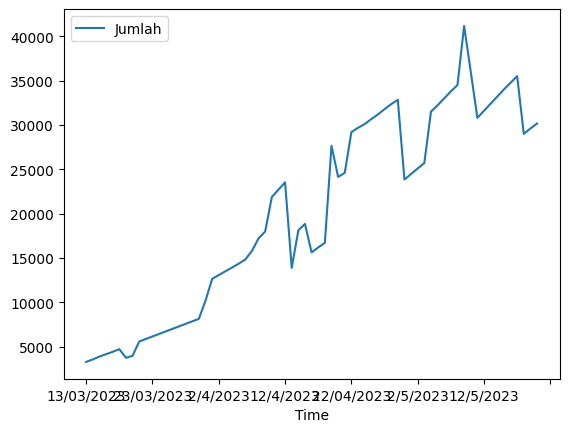

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#path = #enter the path of your csv file
df = pd.read_csv('/home/ubuntu/workspace/Data/KarenganS2.csv')

df.plot(x='Time', y='Jumlah')

In [3]:
df.head(3)

,Time,Jumlah
0,13/03/2023,3300
1,14/03/2023,3585
2,15/03/2023,3900


In [4]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

2023-06-07 09:57:31.858204: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
training_set = df.iloc[:45, 1:2].values
test_set = df.iloc[45:, 1:2].values

In [6]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
x = 5
for i in range(x, 45):
    X_train.append(training_set_scaled[i-x:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

In [7]:

xtrainbaru = np.reshape(X_train, (40, 5))

In [8]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=3)
modelknn=neigh.fit(xtrainbaru, y_train)



In [9]:

dataset_test = df.iloc[45:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 5:].values


NameError: name 'dataset_train' is not defined

In [277]:
inputs = inputs.reshape(-1,1)


In [278]:
inputs =sc.fit_transform(inputs)
X_test = []
for i in range(5, 24):
    X_test.append(inputs[i-5:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)


(19, 5, 1)


In [279]:
xtestbaru = np.reshape(X_test, (19, 5))


In [296]:
predicted_pakan = modelknn.predict(xtestbaru)

predicted_pakan = predicted_pakan.reshape(-1,1)
prediksi= sc.inverse_transform(predicted_pakan)
dataset_test=dataset_test.iloc[0:19]



(19, 1)

In [297]:
from sklearn.metrics import mean_absolute_percentage_error

mean_absolute_percentage_error(dataset_test, prediksi)

0.10608521169172824

In [303]:
dataset_test=dataset_test.to_numpy()

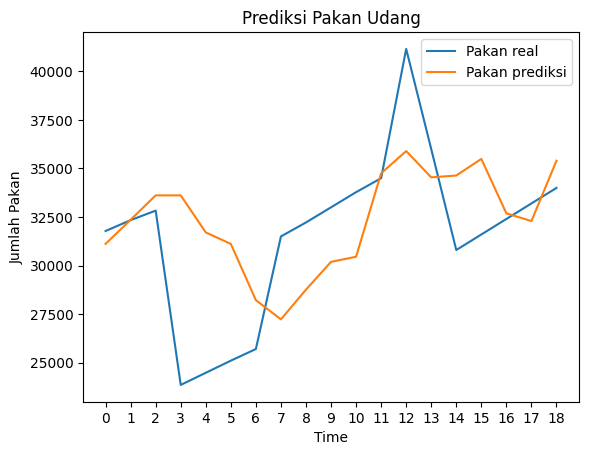

In [304]:
import matplotlib.pyplot as plt
plt.plot(dataset_test,label = 'Pakan real')
plt.plot(prediksi,label = 'Pakan prediksi')
plt.xticks(np.arange(0,19,1))
plt.title('Prediksi Pakan Udang')
plt.xlabel('Time')
plt.ylabel('Jumlah Pakan')
plt.legend()
plt.show()

plt.show()